# INTEGRACIÓN MÉTODO MONTECARLO

a) Aproxime el valor de la siguiente integral en [0,1] usando el método de Montecarlo

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import e

In [7]:
#Definimos la función 

def funct(x):
    return((e**x-1)/(e-1))

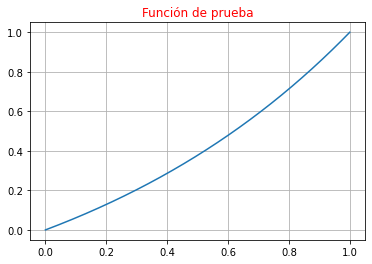

In [8]:
#Graficamos la función 
Xi=np.linspace(0,1,1000)
plt.grid(True)
plt.title('Función de prueba', color='red')
plt.plot(Xi, funct(Xi))
plt.show()

In [9]:
def integrate(x1,x2,func=funct,n=100000):  #Método Montecarlo 
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)


0 1 0 1.0
El valor de la integral es:  0.41545
0 1 0 1.0


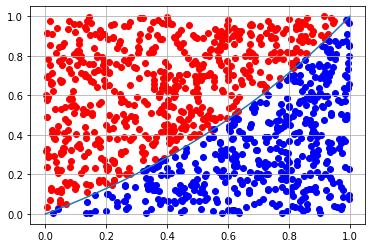

In [11]:
print("El valor de la integral es: ", integrate(0,1)[0])
df=pd.DataFrame()
_,x,y,c=integrate(0,1,n=1000)
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0,1,1000)
plt.grid(True)
plt.plot(X,funct(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()


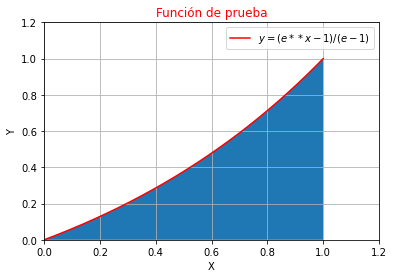

In [12]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funct(X), color='red', label="$y=(e**x-1)/(e-1)$")
plt.fill_between(X,funct(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

b) Use la técnica de reducción de varianzas antitéticas para reducir la varianza. Indique el porcentaje en que se redujo la varianza. 

In [13]:
#Método de la media muestral
def integ(func=funct, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funct(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es: ", round(integ()[1],5))

El valor de la integral es: 0.41459
El error estándar es:  0.00525


In [14]:
def mc_crudo(funct, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(funct(u) + funct(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("\nEl valor de la integral con v antiteticas es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

In [15]:
def mc_crudo1(funct, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=funct(u)
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("\nEl valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))

    return np.mean(suma), np.std(suma)/np.sqrt(n), integral


El valor de la integral es: 0.4225
El error estándar es: 0.00914

El valor de la integral con v antiteticas es: 0.41915
El error estándar es: 0.00116


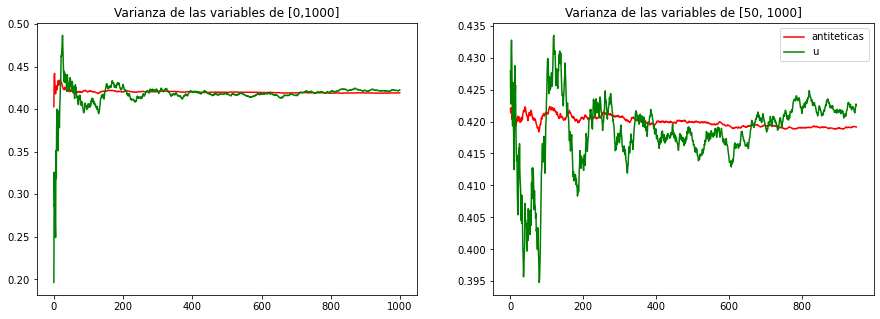

In [29]:
_1,error_estandar,X1=mc_crudo1(funct, n=1000)
_2,error_estandar2,X=mc_crudo(funct, n=1000)

plt.figure(1,figsize=(15,5))


plt.subplot(1,2,1)
plt.title("Varianza de las variables de [0,1000]")   
plt.plot(X, color='red', label='antiteticas')
plt.plot(X1, color='green', label='u')

plt.subplot(1,2,2)
plt.title("Varianza de las variables de [50, 1000]")
plt.plot(X[50:], color='red', label='antiteticas') 
plt.plot(X1[50:], color='green', label='u')


plt.legend()
plt.show()

In [30]:
print("El porcetaje de variación es: ", round((error_estandar-error_estandar2)/error_estandar*100,2))

El porcetaje de variación es:  87.29
